In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/multespectral-field-images/table_field2.csv
/kaggle/input/multespectral-field-images/table_field1.csv
/kaggle/input/multespectral-field-images/images/field2_image874_2021-07-14.json
/kaggle/input/multespectral-field-images/images/field1_image147_2018-06-27.json
/kaggle/input/multespectral-field-images/images/field1_image214_2018-10-20.json
/kaggle/input/multespectral-field-images/images/field2_image38_2017-07-25.json
/kaggle/input/multespectral-field-images/images/field2_image648_2020-01-16.json
/kaggle/input/multespectral-field-images/images/field1_image131_2018-05-23.json
/kaggle/input/multespectral-field-images/images/field1_image455_2021-08-30.json
/kaggle/input/multespectral-field-images/images/field1_image104_2018-03-02.json
/kaggle/input/multespectral-field-images/images/field2_image369_2018-08-24.json
/kaggle/input/multespectral-field-images/images/field2_image95_2017-09-08.json
/kaggle/input/multespectral-field-images/images/field1_image218_2018-11-02.json
/kaggl

In [2]:
import os
print(os.listdir("/kaggle/input"))

['multespectral-field-images']


In [3]:
import os
import json

dataset_path = "/kaggle/input/multespectral-field-images/images"

files = os.listdir(dataset_path)
print(files[:5])

['field2_image874_2021-07-14.json', 'field1_image147_2018-06-27.json', 'field1_image214_2018-10-20.json', 'field2_image38_2017-07-25.json', 'field2_image648_2020-01-16.json']


In [4]:
sample_file = dataset_path + "/" + files[0]

with open(sample_file, "r") as f:
    img = json.load(f)

In [5]:
print(type(img["data"]))
print(len(img["data"]))

print(type(img["data"][0]))
print(len(img["data"][0]))

print(type(img["data"][0][0]))
print(len(img["data"][0][0]))

<class 'list'>
111
<class 'list'>
113
<class 'list'>
14


1. Extract RED and NIR images

In [6]:
import numpy as np

data_array = np.array(img["data"])

red = data_array[:, :, 3]
nir = data_array[:, :, 7]

print(red.shape, nir.shape)

(111, 113) (111, 113)


2. Compute NDVI

In [7]:
ndvi = (nir - red) / (nir + red + 1e-6)
print("Mean NDVI:", np.mean(ndvi))

Mean NDVI: 0.32919722846653


3. Visualize NDVI

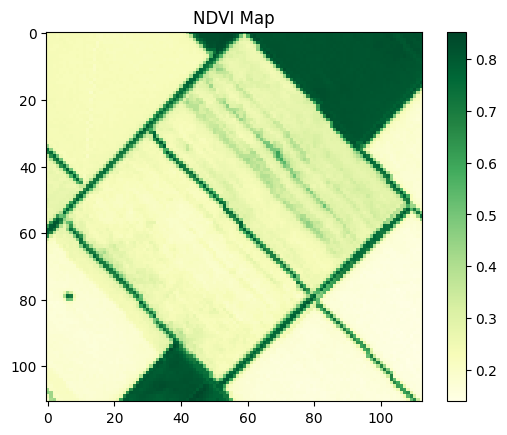

In [8]:
import matplotlib.pyplot as plt

plt.imshow(ndvi, cmap="YlGn")
plt.colorbar()
plt.title("NDVI Map")
plt.show()


4. Load two timestamps

In [9]:
file_before = dataset_path + "/" + files[0]
file_after = dataset_path + "/" + files[20]

with open(file_before, "r") as f:
    img_before = json.load(f)

with open(file_after, "r") as f:
    img_after = json.load(f)

5. Compute NDVI for both

In [10]:
before_arr = np.array(img_before["data"])
after_arr = np.array(img_after["data"])

red_before = before_arr[:, :, 3]
nir_before = before_arr[:, :, 7]

red_after = after_arr[:, :, 3]
nir_after = after_arr[:, :, 7]

ndvi_before = (nir_before - red_before) / (nir_before + red_before + 1e-6)
ndvi_after = (nir_after - red_after) / (nir_after + red_after + 1e-6)

6. Verification metric

In [11]:
mean_before = np.mean(ndvi_before)
mean_after = np.mean(ndvi_after)

improvement = mean_after - mean_before

print("NDVI before:", mean_before)
print("NDVI after:", mean_after)
print("Improvement:", improvement)


NDVI before: 0.32919722846653
NDVI after: 0.48570539201601665
Improvement: 0.15650816354948666


7. Verification score

In [12]:
verification_score = max(0, improvement * 100)

if improvement > 0.05:
    status = "AI Verified"
elif improvement > 0.01:
    status = "Partial Recovery"
else:
    status = "No Improvement"

print("Verification Score:", verification_score)
print("Status:", status)


Verification Score: 15.650816354948665
Status: AI Verified


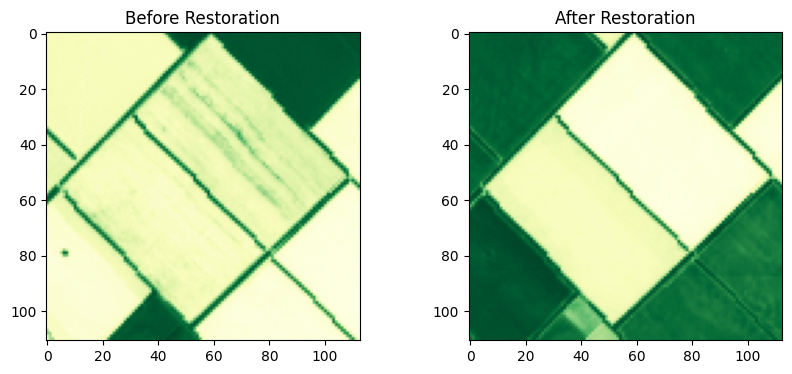

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].imshow(ndvi_before, cmap="YlGn")
axes[0].set_title("Before Restoration")
axes[1].imshow(ndvi_after, cmap="YlGn")
axes[1].set_title("After Restoration")
plt.show()


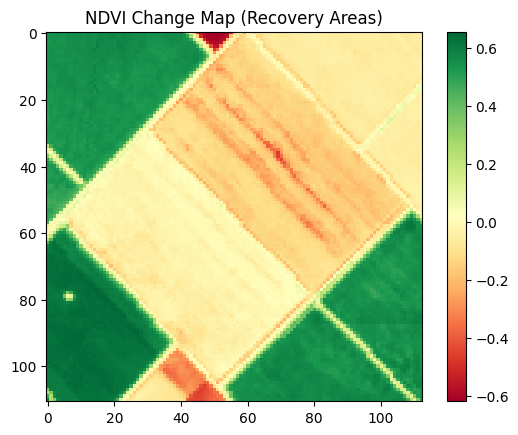

In [14]:
ndvi_diff = ndvi_after - ndvi_before

plt.imshow(ndvi_diff, cmap="RdYlGn")
plt.colorbar()
plt.title("NDVI Change Map (Recovery Areas)")
plt.show()


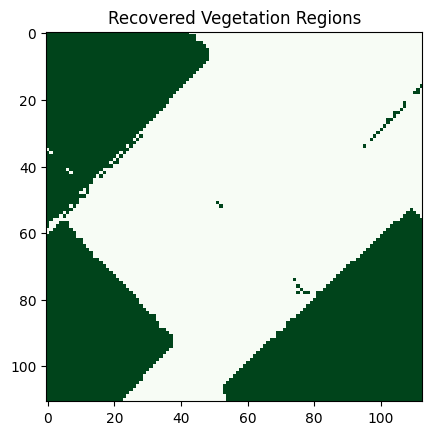

In [15]:
recovery_mask = ndvi_diff > 0.05

plt.imshow(recovery_mask, cmap="Greens")
plt.title("Recovered Vegetation Regions")
plt.show()


In [16]:
recovered_pixels = np.sum(recovery_mask)
total_pixels = recovery_mask.size

recovery_percent = (recovered_pixels / total_pixels) * 100
print("Recovered Area %:", recovery_percent)


Recovered Area %: 40.11002152595073


In [17]:
confidence = (
    0.6 * improvement +
    0.4 * (recovery_percent / 100)
)

print("Verification Confidence:", confidence)

Verification Confidence: 0.25434498423349494
